In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


수면 패턴 시간 (x): [ 59.  64.  60.  65.  58.  90.  85.  67.  66.  61.  65.  60.  60.  66.
  60.  62.  64.  58.  65. 110. 143. 155. 155. 150. 141. 162. 138. 156.
 195. 165. 175. 210. 146. 144. 148. 150. 145. 145. 160. 155. 180. 196.
 200. 185. 207. 210. 185. 195. 190. 188. 202. 196. 190. 190. 194. 188.
 190. 192. 175. 200. 305. 210. 245. 238. 255. 250. 245. 240. 252. 247.
 244. 238. 240. 234. 197. 305. 362. 330. 324. 315. 316. 308. 312. 372.
 376. 362. 384. 352. 368. 452. 468. 447. 455. 450. 452. 540. 520. 512.
 516. 518.  98. 105.  94.  95.  55.  95.  87.  90.  87.  90.  93.  90.
  75.  90.  90. 108.  95.  90. 134.  86.  96.  90.  93.  98. 210. 184.
 175. 180. 182. 175. 172. 180. 185. 182. 178. 170. 178. 180. 175. 179.
 168. 183. 180. 182. 186. 173. 181. 177. 270. 275. 268. 285. 270. 270.
 275. 274. 270. 269. 264. 275. 268. 283. 312. 260. 268. 272. 280. 260.
 275. 269. 380. 372. 375. 362. 355. 350. 360. 364. 360. 366. 365. 360.
 352. 362. 361. 363. 358. 355. 452. 460. 448. 450. 455. 457. 45

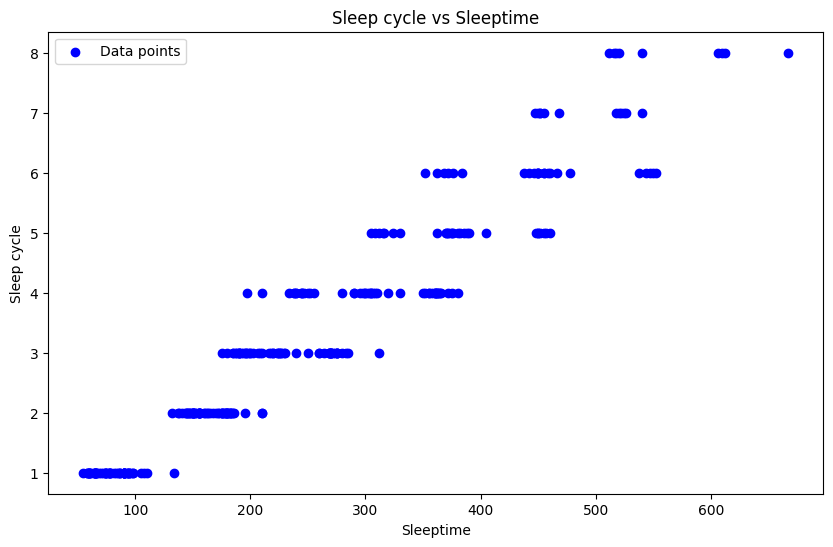

Epoch 0: w = 0.0021607067, b = 0.0000065800
Epoch 10000: w = 0.0130675834, b = 0.0001942427
Epoch 20000: w = 0.0130671162, b = 0.0003480370
Epoch 30000: w = 0.0130666511, b = 0.0005011043
Epoch 40000: w = 0.0130661883, b = 0.0006534479
Epoch 50000: w = 0.0130657276, b = 0.0008050713
Epoch 60000: w = 0.0130652692, b = 0.0009559779
Epoch 70000: w = 0.0130648129, b = 0.0011061711
Epoch 80000: w = 0.0130643587, b = 0.0012556543
Epoch 90000: w = 0.0130639067, b = 0.0014044308


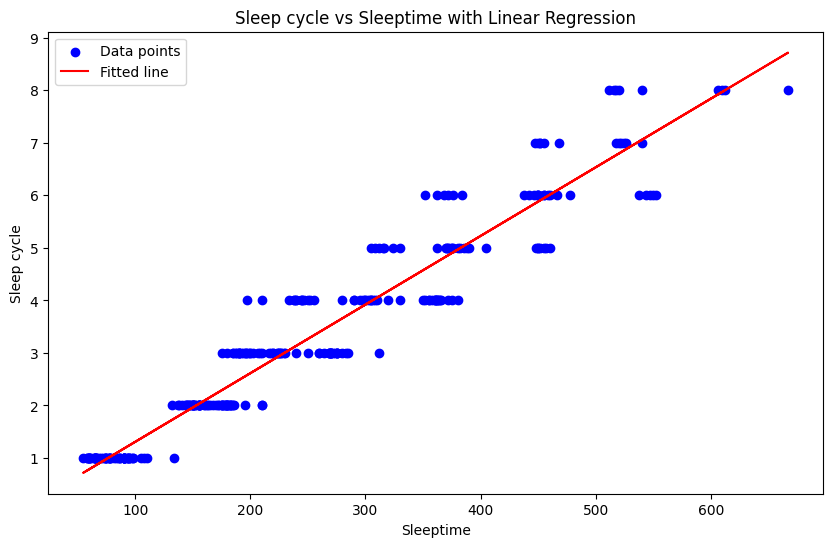

Final model parameters: w = 0.0130634569, b = 0.0015524892
원하는 수면 시간을 분 단위로 입력해주세요: 360
가장 많이 잘 수 있는 시간을 분 단위로 입력해주세요: 400
모드를 선택해주세요 - mode1<효율> mode2<최대 수면>: 최대 수면
당신의 최대 효율 수면 시간은 382.6282393877067분 입니다.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('/content/drive/MyDrive/sleep_pattern.csv', encoding='cp949')

# 데이터 전처리
x = df['수면 패턴 시간'].values.astype(np.float64)
y = df['수면 패턴 주기'].values.astype(np.float64)

# 출력 확인
print("수면 패턴 시간 (x):", x)
print("수면 패턴 주기 (y):", y)

# 시각화 (데이터 산점도)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Sleeptime')
plt.ylabel('Sleep cycle')
plt.title('Sleep cycle vs Sleeptime')
plt.legend()
plt.show()

# 선형 회귀 모델 초기화
w = 0
b = 0

lr = 0.000001
epochs = 100000

n = len(x)

# 경사 하강법 시작
for i in range(epochs):
    y_pred = w * x + b  # 예측값 계산
    error = y - y_pred  # 오차 계산

    # 오차 함수의 w, b에 대한 편미분
    w_diff = -(2/n) * np.sum(x * error)
    b_diff = -(2/n) * np.sum(error)

    # 파라미터 업데이트
    w -= lr * w_diff
    b -= lr * b_diff

    if i % (epochs // 10) == 0:  # 실행 중 Epoch 별 출력
        print(f"Epoch {i}: w = {w:.10f}, b = {b:.10f}")

# 최종 모델 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, w*x + b, color='red', label='Fitted line')  # Linear regression line
plt.xlabel('Sleeptime')
plt.ylabel('Sleep cycle')
plt.title('Sleep cycle vs Sleeptime with Linear Regression')
plt.legend()
plt.show()

print(f"Final model parameters: w = {w:.10f}, b = {b:.10f}")

# 사용자 입력 및 예측
wanted_time = int(input("원하는 수면 시간을 분 단위로 입력해주세요: "))
limit_time = int(input("가장 많이 잘 수 있는 시간을 분 단위로 입력해주세요: "))

while True:
    mode = input("모드를 선택해주세요 - mode1<효율> mode2<최대 수면>: ")
    errorbefore = 1000
    errorafter = 1000
    beforetime = 0
    aftertime = 0
    modeword = ["효율", "최대 수면"]
    if mode in modeword:
        for i in range(1, 8, 1):
            remtime = (i - b) / w
            if remtime < wanted_time:
                error = wanted_time - remtime
                if error < errorbefore:
                    errorbefore = wanted_time - remtime
                    beforetime = remtime
            else:
                error = remtime - wanted_time
                if error < errorafter:
                    errorafter = remtime - wanted_time
                    aftertime = remtime
        if mode == "효율":
            if aftertime > limit_time:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
            else:
                if errorafter > errorbefore:
                    print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
                else:
                    print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(aftertime))
            break
        elif mode == "최대 수면":
            if aftertime > limit_time:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
            else:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(aftertime))
            break
    else:
        print("다시 입력해주세요")